In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(style="white", color_codes=True)

In [4]:
# Import Iri dataset
iris = pd.read_csv("Iris.csv")

# to view the sample of Iris data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Samples from each species
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

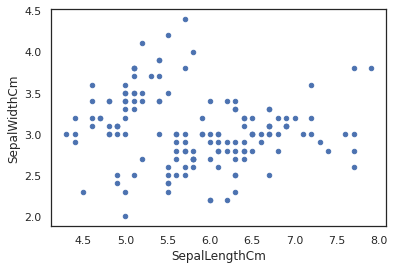

In [6]:
# Pandas Library can be used to make a scatter plot
# Display the plot using plt.show()

iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

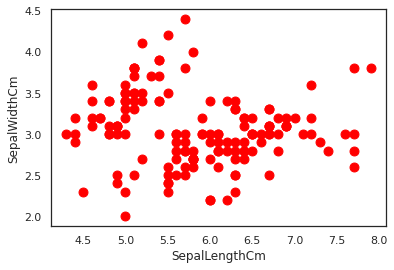

In [7]:
# To change color and size: 
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", s=80, color="red")
plt.show()

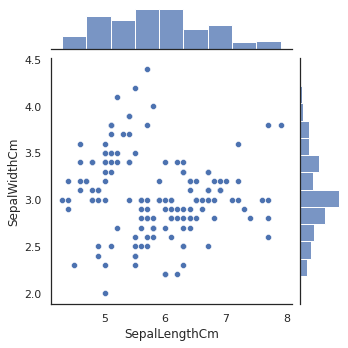

In [8]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)
plt.show()

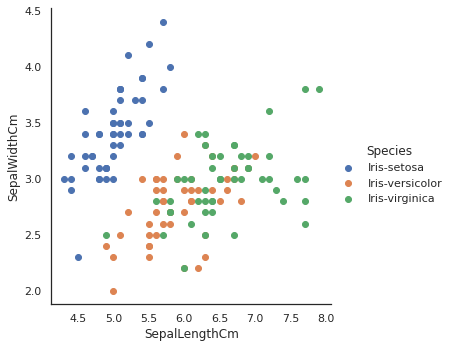

In [9]:
# Modify the graph by assigning each species a different color

sns.FacetGrid(iris, hue="Species", size=5) \
  .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
  .add_legend()

plt.show()

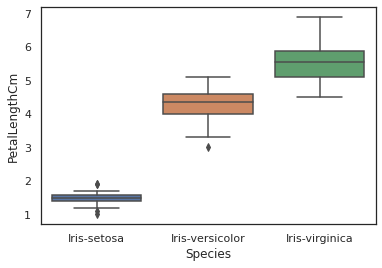

In [10]:
# To plot the species data using a box plot

sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
plt.show()

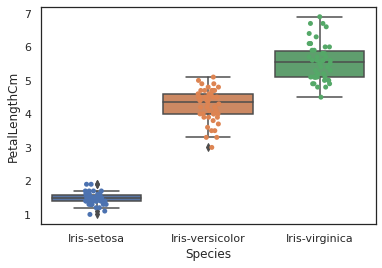

In [11]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 

ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")
plt.show()

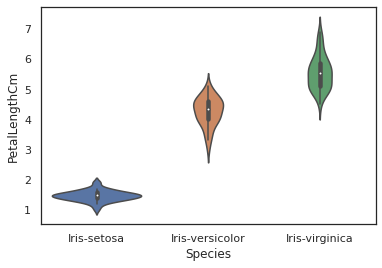

In [12]:
# A violin plot shows the density of the data, simularly to a scatter plot,
#and presents catagorical data like a box plot.
# Denser regions of the data are fatter.

sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=5)
plt.show()

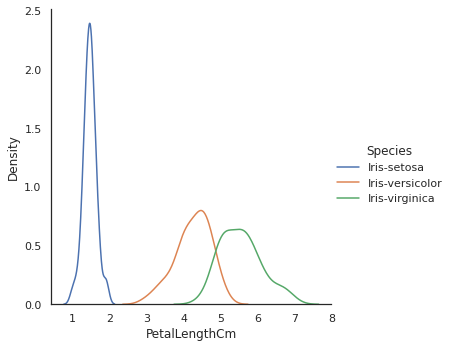

In [13]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used

sns.FacetGrid(iris, hue="Species", size=5) \
  .map(sns.kdeplot, "PetalLengthCm") \
  .add_legend()

plt.show()

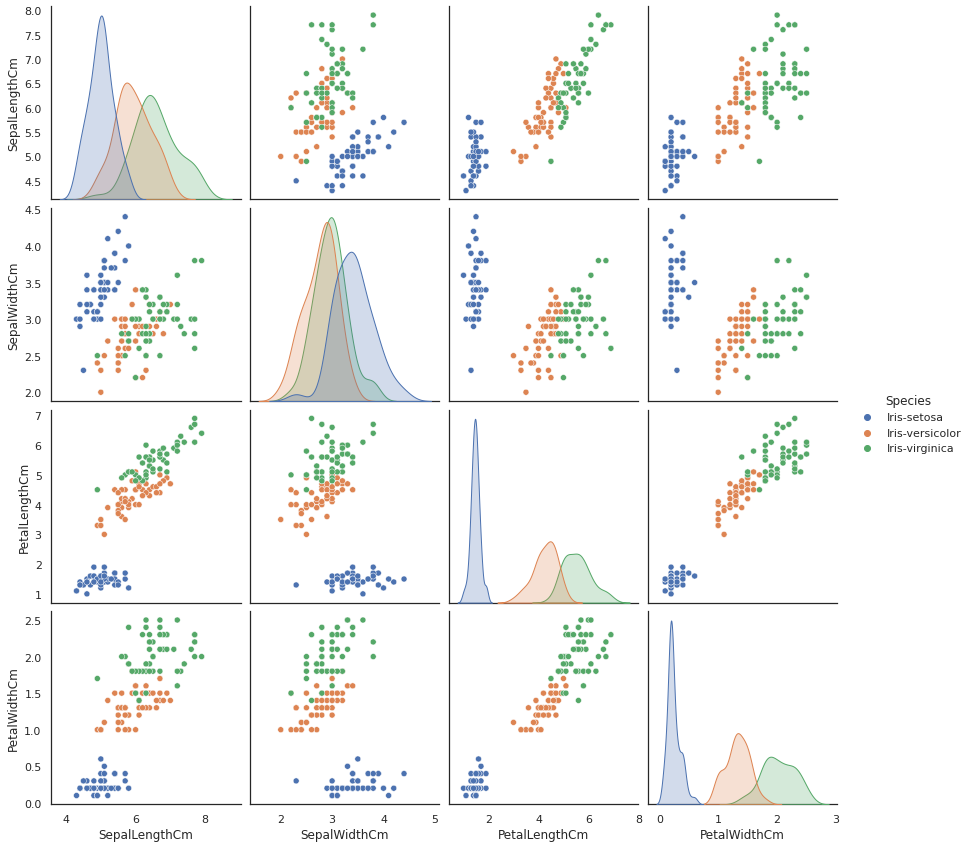

In [14]:
#Use pairplot to analyze the relationship between species for all characteristic combinations. 
# An observable trend shows a close relationship between two of the species

sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)
plt.show()

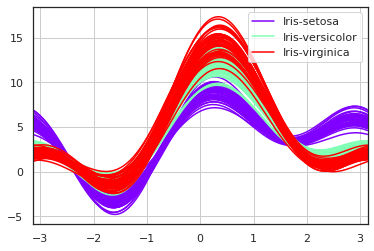

In [15]:
#In Pandas use Andrews Curves to plot and visualize data structure.
#Each multivariate observation is transformed into a curve and represents the coefficients of a Fourier series.
#This useful for detecting outliers in times series data.
#Use colormap to change the color of the curves

pd.plotting.andrews_curves(iris.drop("Id", axis=1), "Species", colormap="rainbow")
plt.show()

In [16]:
import numpy as np

In [17]:
iris.drop("Id", axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


[None, None, None, None, None, None, None, None, None, None]

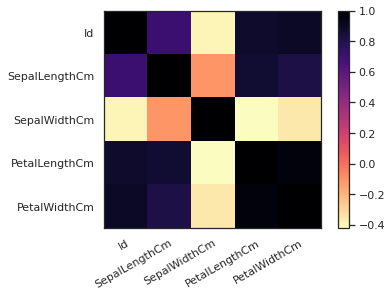

In [18]:
# Heatmap

correlation = iris.corr()
fig, ax = plt.subplots()
img = ax.imshow(correlation.values, cmap="magma_r")

#set Labels

ax.set_xticks(np.arange(len(correlation.columns)))
ax.set_yticks(np.arange(len(correlation.columns)))
ax.set_xticklabels(correlation.columns)
ax.set_yticklabels(correlation.columns)
cbar = ax.figure.colorbar(img, ax=ax, cmap="")
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")


In [19]:
# ---------- CLASSIFICATION ----------

In [20]:
y = iris.pop("Species")

In [21]:
x = iris

In [22]:
print(f"x: {x.shape}")
print(f"y: {y.shape}")

x: (150, 5)
y: (150,)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"xtrain: {xtrain.shape}")
print(f"ytrain: {ytrain.shape}")
print(f"xtest: {xtest.shape}")
print(f"ytest: {ytest.shape}")

xtrain: (120, 5)
ytrain: (120,)
xtest: (30, 5)
ytest: (30,)


In [61]:
ne = knn(n_neighbors=5)

ne.fit(xtrain, ytrain)

KNeighborsClassifier()

In [62]:
ypred = ne.predict(xtest)

In [63]:
print(f"ypred: {ypred.shape}")
print(f"xtest: {xtest.shape}")

ypred: (30,)
xtest: (30, 5)


In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [65]:
accuracy_score(ytest,ypred)

1.0

In [66]:
confusion_matrix(ytest, ypred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [67]:
ypred[0:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [68]:
ytest[0:5]

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
Name: Species, dtype: object

In [69]:
result = pd.DataFrame(data=[ytest.values,ypred],index=['y_test','pred'])
result.transpose()

,y_test,pred
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [70]:
# Multinomial Logistic Regression Model

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
MLR = LogisticRegression(multi_class="multinomial", random_state=42, verbose=1)

In [73]:
MLR.fit(xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(multi_class='multinomial', random_state=42, verbose=1)

In [74]:
predict = MLR.predict(xtest)

In [75]:
accuracy_score(ytest, predict)

1.0

In [76]:
confusion_matrix(ytest, predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])